# Visualising Convnet Outputs

```To understand how successive convnet layer transform their input, and getting idea for the meaning of individual convnet filter.
display the feature maps that are output by conv and pooling layers of network
3 dimension of feature maps - width height and depth```

In [1]:
import tensorflow as tf

gpus = tf.config.list_physical_devices('GPU')
gpu = gpus[0]

tf.config.experimental.set_memory_growth(gpu, True)

In [2]:
from keras.models import load_model


In [3]:
model = load_model('base_dog_cat_small_1.h5')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [14]:
import os

base = 'sample'
files = os.listdir(base)

img_path = os.path.join(base,files[1])
img_path

'sample/cat.1135.jpg'

In [15]:
from keras.preprocessing import image
import numpy as np

img = image.load_img(img_path, target_size=(150,150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
img_tensor.shape

(1, 150, 150, 3)

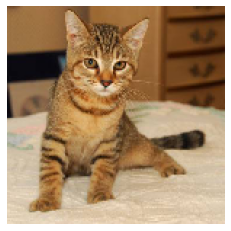

In [16]:
import matplotlib.pyplot as plt

plt.imshow(img_tensor[0])
plt.grid(False)
plt.axis(False)
plt.show()

In [17]:
"""
to extract feature maps - we will create keras model that takes batches of image as input
outputs the activation of all conv and pooling layers

we will create a model - input tensors, output tensor(or list of output tensor)

Sequential allows single output but Model class allows multiple outputs
"""

from keras import models
layer_op = [layer.output for layer in model.layers[:8]] #top 8 layers

activation_model = models.Model(inputs=model.input, outputs=layer_op)

In [18]:
layer_op

[<KerasTensor: shape=(None, 148, 148, 32) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 74, 74, 32) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 72, 72, 64) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 36, 36, 64) dtype=float32 (created by layer 'max_pooling2d_1')>,
 <KerasTensor: shape=(None, 34, 34, 128) dtype=float32 (created by layer 'conv2d_2')>,
 <KerasTensor: shape=(None, 17, 17, 128) dtype=float32 (created by layer 'max_pooling2d_2')>,
 <KerasTensor: shape=(None, 15, 15, 128) dtype=float32 (created by layer 'conv2d_3')>,
 <KerasTensor: shape=(None, 7, 7, 128) dtype=float32 (created by layer 'max_pooling2d_3')>]

In [19]:
# one input and 8 outputs 

activations = activation_model.predict(img_tensor)

In [20]:
len(activations)

8

In [21]:
first_layer_act = activations[0]
first_layer_act.shape

(1, 148, 148, 32)

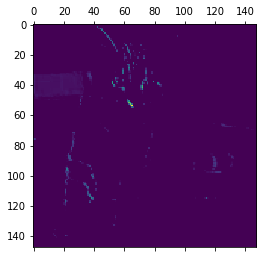

In [38]:
# 4th channel
plt.matshow(first_layer_act[0,:,:,4], cmap='viridis')
plt.show()

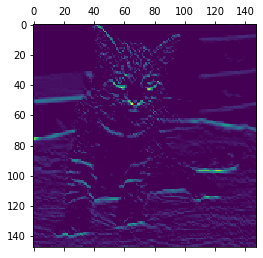

In [41]:
plt.matshow(first_layer_act[0,:,:,7], cmap='viridis')
plt.show()

In [43]:
for act in activations:
    print(act.shape)

(1, 148, 148, 32)
(1, 74, 74, 32)
(1, 72, 72, 64)
(1, 36, 36, 64)
(1, 34, 34, 128)
(1, 17, 17, 128)
(1, 15, 15, 128)
(1, 7, 7, 128)


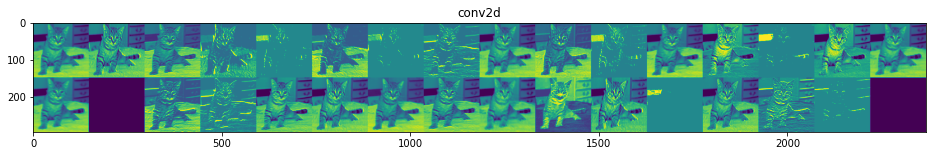

In [111]:
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)
    
img_per_row = 16

for layer_name, layer_activation in zip(layer_names, activations):
    n_features = layer_activation.shape[-1]
    size       = layer_activation.shape[1]
    n_cols     = n_features // img_per_row
    
    display_grid = np.zeros((size*n_cols, img_per_row*size))
    
    for col in range(n_cols):
        for row in range(img_per_row):
            chan_img = layer_activation[0,:,:,col*img_per_row+row]
            chan_img -= chan_img.mean()
            chan_img /= chan_img.std()
            chan_img *= 64
            chan_img += 128
            chan_img = np.clip(chan_img, 0, 255).astype('uint8')
            display_grid[col*size : (col+1)*size,
                         row*size : (row+1)*size] = chan_img
    scale = 1./size
    plt.figure(figsize=(scale*display_grid.shape[1],
                        scale*display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
#     break
    


'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r'

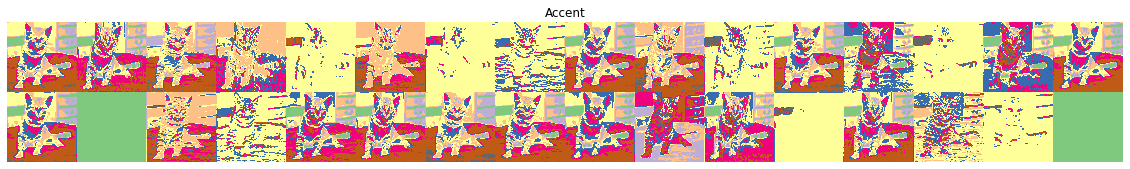

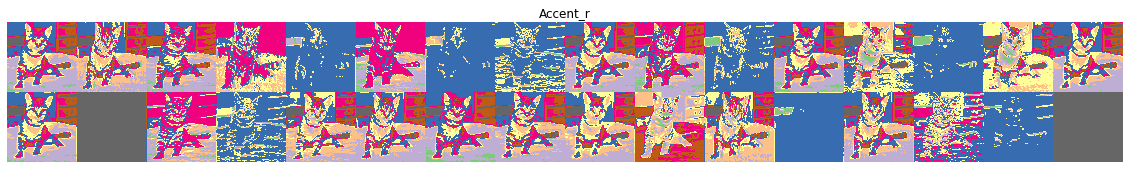

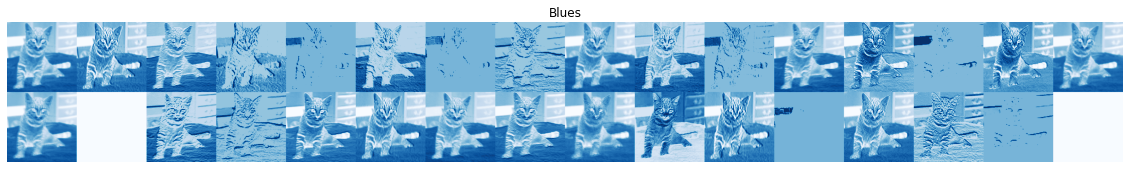

In [112]:
cmaps = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r','CMRmap',
         'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys','Greys_r', 'OrRd',
         'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r','Pastel1', 'Pastel1_r','Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r',
         'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r',
         'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2',
         'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn','YlGnBu', 'YlGnBu_r',
         'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r','autumn', 'autumn_r', 'binary',
         'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r','cividis', 'cividis_r', 'cool', 'cool_r',
         'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix','cubehelix_r', 'flag', 'flag_r', 'gist_earth',
         'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat','gist_heat_r', 'gist_ncar', 'gist_ncar_r',
         'gist_rainbow', 'gist_rainbow_r', 'gist_stern','gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot',
         'gnuplot2', 'gnuplot2_r', 'gnuplot_r','gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'inferno',
         'inferno_r', 'jet', 'jet_r','magma', 'magma_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r',
         'pink', 'pink_r', 'plasma','plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'seismic', 'seismic_r',
         'spring', 'spring_r','summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r',
         'tab20c', 'tab20c_r','terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r',
         'twilight_shifted','twilight_shifted_r', 'viridis', 'viridis_r', 'winter', 'winter_r']

for cmap in cmaps[:3]:
    plt.figure(figsize=(20,4))
    plt.imshow(display_grid, cmap=cmap)
    plt.grid(False)
    plt.axis(False)
    plt.title(cmap)
#     plt.savefig(f'maps/{cmap}_op.jpg')
    plt.show()
